In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

1.14.1-dev20190602


## Data description

DataFrame.describe()
Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

The medv variable is the target variable.


## Data description

Bộ dữ liệu Boston có 506 dòng và 14 thuộc tính. Các thuộc tính được trình bày ở bảng sau.

| Plugin     | <p align="center">README </p>|
| ---------- | ------------- |
| **crim**   | <p align="center"> per capita crime rate by town </p> |
| **zn**     | <p align="center">proportion of residential land zoned for lots over 25,000 sq.ft</p> |
|  **indus** | <p align="center">proportion of non-retail business acres per town </p> |
| **chas**   | <p align="center">Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) </p> |
|  **nox**   | <p align="center">nitrogen oxides concentration (parts per 10 million)</p>  |
|  rm        | <p align="center">average number of rooms per dwelling </p> |
|  **age**   | <p align="center">proportion of owner-occupied units built prior to 1940 </p> |
| **dis**    | <p align="center">weighted mean of distances to five Boston employment centres </p> |
|  **rad**   | <p align="center">index of accessibility to radial highways </p> |
|  **tax**   | <p align="center">full-value property-tax rate per $\$$10,000</p> |
|  ptratio   | <p align="center">pupil-teacher ratio by town</p> |
|  **black** | <p align="center">1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</p> |
|  lstat     | <p align="center">lower status of the population (percent)</p> |
|  **medv**  | <p align="center">median value of owner-occupied homes in $\$$1000s</p> |


### Source 

Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

min_des = np.min(train_features, axis=0)
min_des = np.round(min_des, decimals=1)

max_des = np.max(train_features, axis=0)
max_des = np.round(max_des, decimals=1)

print(min_des)
print(max_des)

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)

train_features = (train_features - train_mean) / train_std

[  0.    0.    0.5   0.    0.4   3.6   2.9   1.1   1.  188.   12.6   0.3
   1.7]
[ 89.  100.   27.7   1.    0.9   8.7 100.   10.7  24.  711.   22.  396.9
  38. ]
train_mean:  [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
train_std [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [9]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()
print(train_features.shape)
print(test_features.shape)

(404, 13)
(102, 13)


In [5]:
def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]), Dense(1)
    ])

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [6]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................
Final Root Mean Square Error on validation set: 2.386


In [9]:
print(type(history.history))

<class 'dict'>


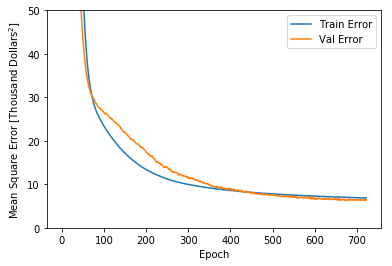

In [6]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

In [7]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

102/102 [==============================] - 0s 43us/sample - loss: 17.0627 - mean_absolute_error: 2.7425 - mean_squared_error: 17.0627
Root Mean Square Error on test set: 4.131


7.2
(102, 13)
(102, 1)
(102,)


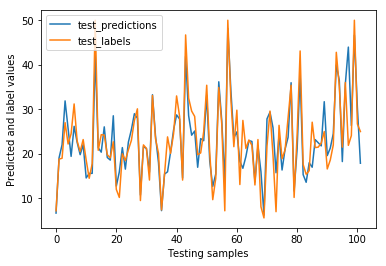

In [16]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[13]), Dense(1)
    ])

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mse'])
    return model

model = build_model()
model.load_weights('pycodes/house_price_prediction.ckpt')

(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)

test_features_norm = (test_features - train_mean) / train_std
print(test_features_norm.shape)

test_predictions = model.predict(test_features_norm)
print(test_predictions.shape)
test_predictions = test_predictions.flatten()
print(test_predictions.shape)

plt.figure()
plt.xlabel('Testing samples')
plt.ylabel('Predicted and label values')
plt.plot(np.arange(0,test_predictions.shape[0]),test_predictions, label='test_predictions')
plt.plot(np.arange(0,test_predictions.shape[0]),test_labels, label='test_labels')
plt.legend()
plt.show()



In [18]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[13]), Dense(1)
    ])

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mse'])
    return model

model = build_model()
model.load_weights('pycodes/house_price_prediction.ckpt')

# get mean and std from training data
(train_features, train_labels), _ = keras.datasets.boston_housing.load_data()
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)



# test for new sample
testing_sample = [18.0846, 0., 18.1, 0., 0.679, 6.434,  100., 1.8347, 24., 666., 20.2, 27.25, 29.05]
print(testing_sample)

# 1.normalize
testing_sample = (testing_sample - train_mean) / train_std
print(testing_sample)
print(testing_sample.shape)

# 2. expand dim from (13,) to (1,13) = (number_of_sample, 13). Tensorflow requires this
testing_sample = np.expand_dims(testing_sample, axis=0)
print(testing_sample.shape)

#3. feed into network
predicted_value = model.predict(testing_sample)
print('Predicted house price: ', predicted_value[0][0])
print('True value is 7.2')

[18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0, 1.8347, 24.0, 666.0, 20.2, 27.25, 29.05]
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]
(13,)
(1, 13)
Predicted house price:  6.682618
True value is 7.2
